의사결정 트리(Decision tree)  
데이터 분류 및 회귀에 사용되는 지도 학습 알고리즘으로 가장 큰 장점은 결과값이 어떻게 나왔는지 이해하기가 가장 쉽다는 것이다. 또한 높은 정확도 역시 상당히 큰 장점 중 하나이다. 하지만 과대 적합되기 쉬운 알고리즘이라는 단점도 있다.
***
의사결정 트리 알고리즘은 스므고개와 상당히 비슷하다. 데이터의 특징을 바탕으로 데이터를 연속적으로 분리하다 보면 결국 하나의 정답으로 데이터를 분류할 수 있는데 스므고개에서 적은 질문으로 정답을 맞추기 위해서는 의미 있는 질문을 먼저 하는 것이 중요하듯이 의사결정 트리에서도 의미 있는 질문을 먼저 하는 것이 상당히 중요하다. 데이터의 특징 속에서 분류에 큰 영향을 끼치는 특징을 발견하고 상위 노드로 선택하는 알고리즘이 의사결정 트리 알고리즘의 핵심이다.
***
스므고개를 할 때 질문자는 질문을 하나 던질 때마다 약간씩의 정보를 획득한다. 약간씩의 정보를 획득하는 과정은 정답에 대한 불확실성이 조금씩 줄어든다는 것과 같은 개념이다. 정보 이론(Information Theory)에서는 이 불확실성을 수치적으로 표현한 값을 엔트로피(Entropy)라고 표현하며 정보 이득(Information gain)은 질문 이전의 엔트로피에서 질문 후의 엔트로피를 뺀 값이된다. 즉 불확실성이 줄어든 정도를 정보 이득이라고 한다.
***
지니 계수(Gini Index)  
P^2 + Q^2 으로 계산하며 불순도를 측정하는 지표로 데이터의 통계적 분산정도를 정량화해서 표현한 것을 의미한다.  
사이킷런의 의사결정 트리는 CART(Classification And Regression Tree) 타입의 의사결정 트리이며 CART는 트리의 노드마다 특징을 이진 분류하는 특징이 있기에 사이킷런은 트리를 구성할 때 지니 계수를 사용한다.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

데이터 획득  
district => 구, dong => 동, latitude => 위도, longitude => 경도, label => 강동, 강서, 강남, 강북으로 구분한 지역

In [2]:
# 구 데이터 => 학습 데이터
district_dict_list = [
    {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
    {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
    {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
    {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
    {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},

    {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
    {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
    {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
    {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
    {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},

    {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
    {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
    {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
    {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
    {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},

    {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
    {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
    {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
    {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
    {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
 ]

# 동 데이터 => 테스트 데이터
dong_dict_list = [
    {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
    {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
    {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
    {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
    {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},

    {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
    {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
    {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
    {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
    {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},

    {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
    {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
    {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
    {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
    {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},

    {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
    {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
    {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
    {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
    {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
 ]

In [3]:
train_df = pd.DataFrame(district_dict_list)
train_df.head()

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo


In [4]:
test_df = pd.DataFrame(dong_dict_list)
test_df.head()

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo


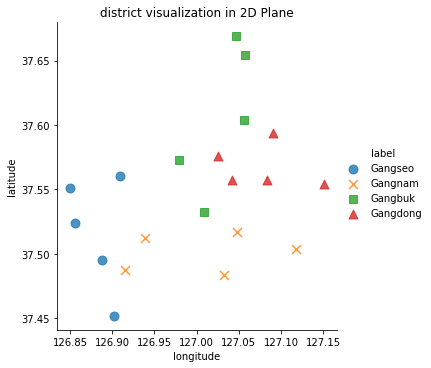

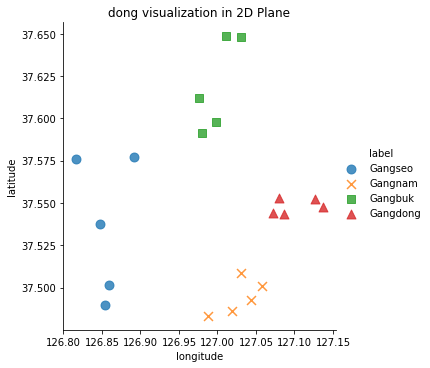

In [5]:
sns.lmplot(data=train_df, x='longitude', y='latitude', fit_reg=False, hue='label', markers=['o', 'x', 's', '^'],
          scatter_kws={'s': 80})
plt.title('district visualization in 2D Plane')
sns.lmplot(data=test_df, x='longitude', y='latitude', fit_reg=False, hue='label', markers=['o', 'x', 's', '^'],
          scatter_kws={'s': 80})
plt.title('dong visualization in 2D Plane')
plt.show()

데이터 전처리

In [6]:
# 위 시각화 결과를 통해 구 이름과 동 이름이 학습이나 테스트에 별 영향을 미치지 않는다는 점을 알았으므로 학습 및 테스트에 
# 필요없는 특징을 데이터에서 제거한다.
train_df.drop(['district'], axis=1, inplace=True) # 학습 데이터에서 구 제거
test_df.drop(['dong'], axis=1, inplace=True)      # 테스트 데이터에서 동 제거

In [7]:
x_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]
x_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

모델 학습  
사이킷런의 의사결정 트리를 로드해서 학습한다.

In [8]:
from sklearn import tree
from sklearn import preprocessing

In [9]:
# 사이킷런의 preprocessing에 포함된 LabelEncoder 객체는 함수는 데이터를 모델화시키고 학습을 시키기 위해서 fit_transform()
# 함수를 사용해서 숫자로 만든다.
# Spain, Germany, France가 있는 경우 Spain은 0, Germany는 1, France는 2라고 정의하려는 경우 사용한다.
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)
print(y_encoded)

[3 3 3 3 3 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]


In [10]:
# DecisionTreeClassifier() 함수로 의사결정 트리를 학습시킨다.
# 의사결정 트리의 내부 알고리즘 구동시 랜덤하게 특성들과 데이터의 건수를 선택하는 로직이 포함되어 있기 때문에 random_state로
# 특정값을 지정하여 의사결정 트리 수행시 마다 동일한 Rule의 트리를 만들 수 있다.
clf = tree.DecisionTreeClassifier(random_state=35).fit(x_train, y_encoded)

의사결정 트리를 시각화 하는 함수를 만든다.

In [11]:
print(np.array([1, 2, 3]))
print(np.array([4, 5, 6]))
# np.c_[a, b] => 두 개의 1차원 배열을 붙여서 2차원 배열을 만든다.
print(np.c_[np.array([1, 2, 3]), np.array([4, 5, 6])])

[1 2 3]
[4 5 6]
[[1 4]
 [2 5]
 [3 6]]


In [26]:
def display_decision_surface(clf, x, y):
    x_min = x.longitude.min() - 0.01;
    x_max = x.longitude.max() + 0.01;
    y_min = x.latitude.min() - 0.01;
    y_max = x.latitude.max() + 0.01;
    
    # classes_: LabelEncoder 객체의 fit_transform() 함수를 실행했을 때 숫자로 대체된 문자열의 개수를 의미한다.
    n_classes = len(le.classes_)
    # print(n_classes)
    plot_color = 'rywb'
    plot_step = 0.001
    
    # meshgrid() 함수는 좌표 벡터로 부터 좌표 행렬을 반환한다.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    
    # predict() 함수는 학습 결과에 따른 예측을 한다.
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # print(Z)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu) # 등고선 차트
    
    for i, color in zip(range(n_classes), plot_color):
        # print(i, color)
        # np.where(): 조건에 만족하는 값의 인덱스를 찾는다.
        idx = np.where(y == i)
        # print(idx)
        plt.scatter(x=x.loc[idx].longitude, y=x.loc[idx].latitude, c=color, label=le.classes_[i], cmap=plt.cm.RdYlBu,
                   edgecolor='black', s=100)
    # =======================
    
    plt.title('Decision surface of a decision tree', fontsize=20)
    plt.legend(bbox_to_anchor=[1.05, 1], loc=2, borderaxespad=0, fontsize=14) # 범례
    plt.xlabel('longitude', fontsize=14)
    plt.ylabel('latitude', fontsize=14)
    
    plt.rcParams['figure.figsize'] = [10, 7]
    # plt.rcParams['font.size'] = 30 # x, y축 레이블의 크기를 동시에 변경한다.
    plt.rcParams['xtick.labelsize'] = 15 # x축 레이블 크기를 변경한다.
    plt.rcParams['ytick.labelsize'] = 15 # y축 레이블 크기를 변경한다.
    plt.show()

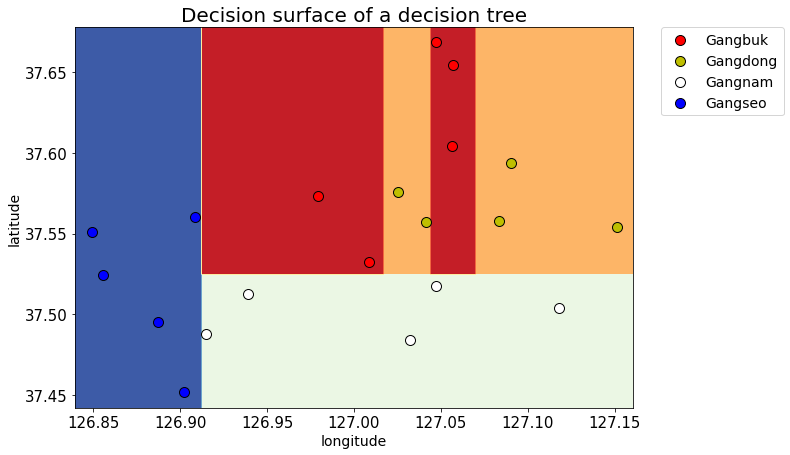

In [27]:
display_decision_surface(clf, x_train, y_encoded)

의사결정 트리는 과대 적합되기가 상당히 쉬운 모델이다.  
사이킷런의 의사결정 트리는 과대 적합을 피할 수 있도록 별도의 파라미터를 제공하는데 파라미터를 설정하지 않을 경우 모델은 학습되지만 과대 적합될 가능성이 높다.  
여기서는 아무런 파라미터 설정 없이 학습 데이터를 학습한 의사결정 트리의 결정 표면을 시각화 해 보았다.  
위의 차트는 강북 사이에 강동에 해당되는 데이터들이 보이는것으로 봐서 학습 데이터에만 너무 치우치게 학습되었다. 즉, 과대 적합되었다고 판단할 수 있다.

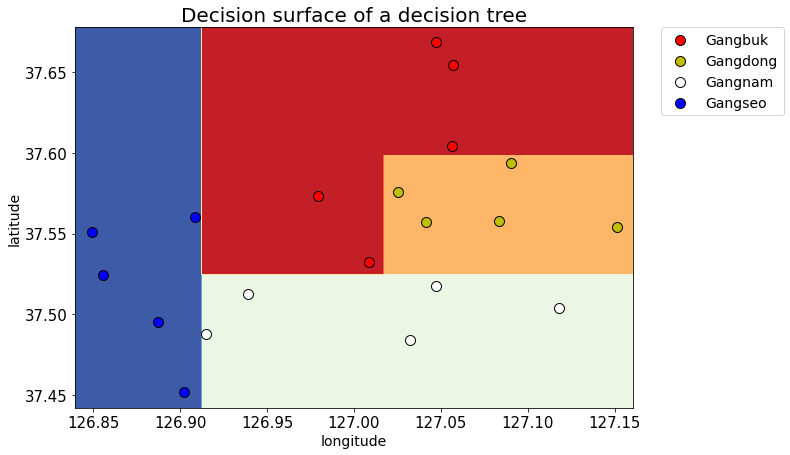

In [37]:
# 과대 적합을 피하기 위해 파라미터를 설정한다.
# max_depth: 트리의 최대 깊이
# min_samples_split: 자식 노드를 가지기 위한 최소한의 데이터 개수
# min_samples_leaf: 리프(터미널, 단노드, 자식이 없는 노드) 노드의 최소 데이터 개수
clf = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=2, random_state=70).fit(x_train, y_encoded)
display_decision_surface(clf, x_train, y_encoded)

모델 테스트

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
pred = clf.predict(x_test) # 모델 정확도를 예측한다.
print('정확도: {}'.format(accuracy_score(y_test.values.ravel(), le.classes_[pred]))) # 정확도를 출력한다.

정확도: 1.0


In [40]:
comparison = pd.DataFrame({'실제값': y_test.values.ravel(), '예측값': le.classes_[pred]})
comparison

,실제값,예측값
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam


In [41]:
# 정확도 예측 후 임의의 내용을 테스트 데이터를 만든다.
dong_dict_list = [
    {'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
    {'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangnam'},
    {'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
    {'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangdong'},
    {'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'}
]

test_df = pd.DataFrame(dong_dict_list)
x_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

In [42]:
# 임의의 데이터에 대해 학습시킨다.
pred = clf.predict(x_test)
print('정확도: {}'.format(accuracy_score(y_test.values.ravel(), le.classes_[pred])))
comparison = pd.DataFrame({'실제값': y_test.values.ravel(), '예측값': le.classes_[pred]})
comparison

정확도: 0.6


,실제값,예측값
0,Gangseo,Gangseo
1,Gangnam,Gangseo
2,Gangseo,Gangseo
3,Gangdong,Gangseo
4,Gangseo,Gangseo


의사결정 트리 시각화 및 pdf 파일로 만들기

In [43]:
# graphviz를 사용하려면 아래와 같은 과정을 먼저 실행해야 한다.
# graphviz 다운로드 사이트에서 설치 파일을 다운로드 받아 설치한다.
# !pip install graphviz
# 환경 변수 path에 'C:\Program Files\Graphviz\bin'가 없으면 추가한다.

In [44]:
import graphviz

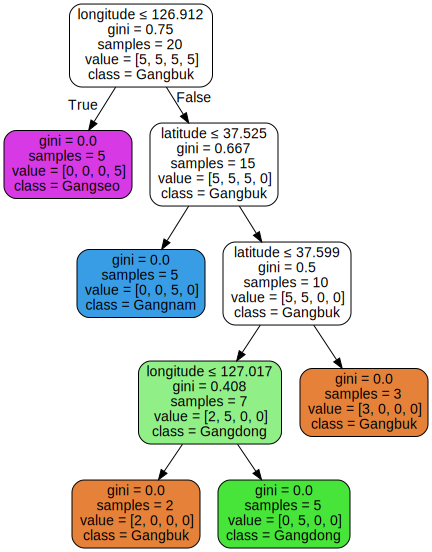

In [45]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=['longitude', 'latitude'],
                               class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'], filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
# 랜더링된 의사결정 트리를 pdf 파일로 생성한다.
graph.render('seoul')
graph